<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581595-1694703010/blob/main/Assignment3_21BKT0006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


In [ ]:
df = pd.read_csv('penguins_size.csv')
print(df.head())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Mean: 17.151169590643278
Median: 17.3
Standard Deviation: 1.9747931568167816


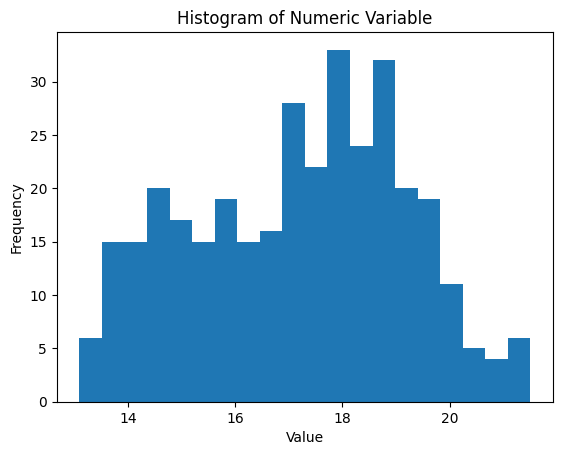

In [ ]:
import pandas as pd

numeric_column = df['culmen_depth_mm']
mean = numeric_column.mean()
median = numeric_column.median()
std_dev = numeric_column.std()

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

import matplotlib.pyplot as plt

plt.hist(numeric_column, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Variable")
plt.show()


Correlation Coefficient: 0.8712017673060111


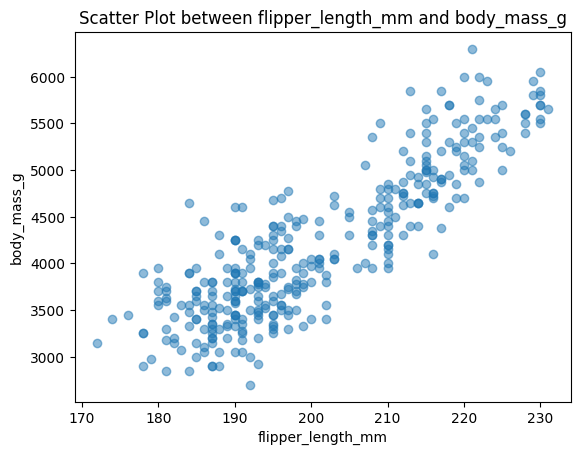

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numeric_column1 = df['flipper_length_mm']
numeric_column2 = df['body_mass_g']
correlation_coefficient = numeric_column1.corr(numeric_column2)

print("Correlation Coefficient:", correlation_coefficient)

plt.scatter(numeric_column1, numeric_column2, alpha=0.5)
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Scatter Plot between flipper_length_mm and body_mass_g")
plt.show()


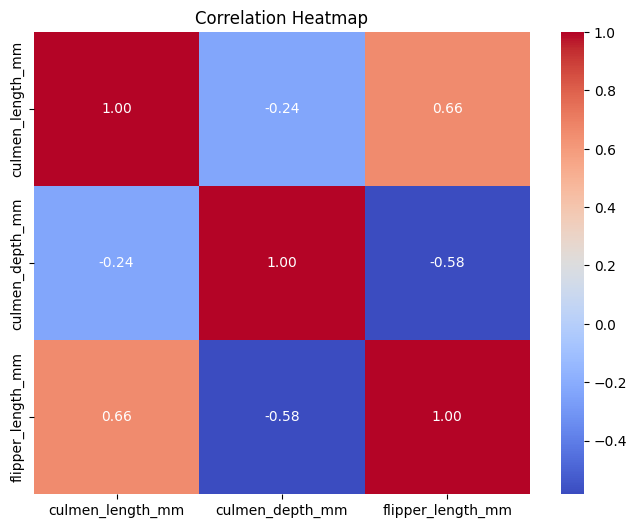

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


TASK 4- Perform descriptive statistics on the dataset.

In [ ]:
import pandas as pd

numerical_summary = df.describe()

categorical_summary = df.describe(include='object')

categorical_column = 'culmen_length_mm'
category_counts = df[categorical_column].value_counts()
category_percentages = df[categorical_column].value_counts(normalize=True) * 100

print("Summary Statistics for Numerical Variables:")
print(numerical_summary)

print("\nSummary Statistics for Categorical Variables:")
print(categorical_summary)

print("\nFrequency Counts for", categorical_column, ":")
print(category_counts)

print("\nPercentage of Each Category for", categorical_column, ":")
print(category_percentages)


Summary Statistics for Numerical Variables:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

Summary Statistics for Categorical Variables:
       species  island   sex
count      344     344   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       152     168   168

Frequency Counts for culmen_length_mm :
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6  

TASK 5- Check for Missing values and deal with them

In [ ]:
import pandas as pd

missing_values = df.isnull().sum()

print("Missing Values Count:")
print(missing_values)


Missing Values Count:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [ ]:
df_cleaned = df.dropna()

TASK 6- Find the outliers and replace them outliers

In [ ]:
import pandas as pd
import numpy as np
outlier_threshold = 1.5

outliers_df = pd.DataFrame(columns=df.columns)

for column in df.select_dtypes(include=[np.number]):

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_df = pd.concat([outliers_df, outliers])

print("Outliers:")
print(outliers_df)


Outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [ ]:

for column in outliers_df.select_dtypes(include=[np.number]):
    median_value = df[column].median()
    df.loc[outliers_df.index, column] = median_value


TASK 7-Check the correlation of independent variables with the target

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
numerical_independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for numerical_variable in numerical_independent_variables:
    formula = f"{numerical_variable} ~ species"
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"ANOVA for {numerical_variable}:")
    print(anova_table)


ANOVA for culmen_length_mm:
               sum_sq     df           F        PR(>F)
species   7194.317439    2.0  410.600255  2.694614e-91
Residual  2969.888087  339.0         NaN           NaN
ANOVA for culmen_depth_mm:
              sum_sq     df           F        PR(>F)
species   903.967209    2.0  359.789149  1.507658e-84
Residual  425.867324  339.0         NaN           NaN
ANOVA for flipper_length_mm:
                sum_sq     df           F         PR(>F)
species   52473.283899    2.0  594.801627  1.351710e-111
Residual  14953.257037  339.0         NaN            NaN
ANOVA for body_mass_g:
                sum_sq     df           F        PR(>F)
species   1.468642e+08    2.0  343.626275  2.892368e-82
Residual  7.244348e+07  339.0         NaN           NaN


TASK 8- Check for Categorical columns and perform encoding

In [ ]:
import pandas as pd

categorical_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns)

print("DataFrame with One-Hot Encoding:")
print(df_encoded)


DataFrame with One-Hot Encoding:
   numeric1  category1_A  category1_B  category1_C  category2_X  category2_Y  \
0        10            1            0            0            1            0   
1        20            0            1            0            0            1   
2        15            1            0            0            1            0   
3        25            0            0            1            0            0   
4        30            0            1            0            0            0   

   category2_Z  
0            0  
1            0  
2            0  
3            1  
4            1  


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print("DataFrame with Label Encoding:")
print(df)


DataFrame with Label Encoding:
   category1  category2  numeric1
0          0          0        10
1          1          1        20
2          0          0        15
3          2          2        25
4          1          2        30


TASK 9- Split the data into dependent and independent variables.

In [ ]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')

independent_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

target_column = 'species'

if set(independent_columns + [target_column]).issubset(df.columns):
    X = df[independent_columns]  # Features
    y = df[target_column]         # Target

    print("Independent Variables (Features):")
    print(X.head())

    print("\nDependent Variable (Target):")
    print(y.head())
else:
    print("One or more specified columns do not exist in the DataFrame.")


Independent Variables (Features):
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
3               NaN              NaN                NaN          NaN
4              36.7             19.3              193.0       3450.0

Dependent Variable (Target):
0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object


TASK 10- Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

